# Exercise 1.2

Suppose that we use *perceptron* to detect spam messages. Let's say that each email message is represented by the frequency of occurrence of keywords, and the output is $+1$ if the message is considered spam

## a) Can you think of some words that will end up with a large positive weight in the perceptron? 

offer, sale, winner, discount, free, now, earn

## b) How about keywords that will get a negative weight?

Sincerely, reply, Hi, best regards, due, thanks, 

## c) What parameter in the perceptron directly affects how many borderline messages end up being classified as spam?

The parameter $b$, often called *bias*, directly affects how many borderline messages end up being classified as spam, because is the threshold by which is determined if certain email is spam or it is not. The higher the parameter $b$ is the, the more emails classified as spam are; The lower the parameter $b$ is, the less emails classified as spam are.

# Exercise 1.3

The weight update rule in (1.3) has the nice interpretation that it moves in the direction of classifying $x(t)$ correctly

## a) Show that $y(t)w^{T}(t)x(t)<0$

Since the example $(x(t), y(t))$ is misclassified, $y(t)\neq sign(w^{T}x(t))$, therefore if we multiply both therms the result will be always negative.

## b) Show that $y(t)w^{T}(t+1)x(t) > y(t)w^{T}(t)x(t)$

$\begin{align}
y(t)w^{T}(t+1)x(t) &= y(t)(w(t) + y(t)x(t))^{T}x(t)\\
&= y(t)(w^{T}(t) + y(t)x^{T}(t))x(t)\\
&= y(t)(w^{T}(t)x(t) + y(t)x^{T}(t)x(t))\\
&= y(t)w^{T}(t)x(t) + y(t)y(t)x^{T}(t)x(t)\\
&> y(t)w^{T}(t)x(t)\quad\text{Since }y(t)y(t)x^{T}(t)x(t) > 0
\end{align}$

## c) As far as classifying $x(t)$ is concerned, argue that the move from $w(t)$ to $w(t+1)$ is a move 'in the right direction'. 

As we seen in the last exercise, the sequence $y(t)w^{T}(t)x(t)$ is an increasing one. Hence
* If $y(t)$ is positive and $w^{T}(t)x(t)$ negative, inequality from exercise 2.b tells us amount $w^{T}(t)x(t)$ is increasing, as $y(t)$ is 1 so our inequality transforms into
$$w^{T}(t+1)x(t) > w^{T}(t)x(t).$$
Telling us, the sequence of $w^{T}(t)$ is increasing.
* If $y(t)$ is negative and $w^{T}(t)x(t)$ positive, inequality from exercise 2.b tells us amount $w^{T}(t)x(t)$ is decreasing, because $y(t)$ is equal to $-1$, so our inequality gets transformed into
$$w^{T}(t+1)x(t)<w^{T}(t)x(t).$$
Telling us, the sequence of $w^{T}(t)$ is decreasing.


# Exercise 1.10

Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping $1000$ fair coins. Flip each coin independently $10$ times. Let's focus on $3$ coins as follows: $c_{1}$ is the first coin flipped; $c_{\text{rand}}$ is a coin you choose at random; $c_{\text{min}}$ is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let $v_{1}, v_{\text{rand}}$ and $v_{\text{min}}$ be the fraction of heads you obtain for the respective three coins.

In [2]:
import numpy as np
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status
    """
    
    hts = np.zeros(total_coins) #head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def run_once(total_coins, total_flips, print_freq = False):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins) # store the sum of heads in total_flips
    
    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)
    
    hts_freq = hts_sum/total_flips
    
    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    if print_freq:
        print('Frequency of first coin: {}'.format(v1))
        print('Frequency of a random coin: id({})-freq({})'.format(crand, vrand))
        print('Frequency of the coin with minimum frequency: id({})-freq({})'.format(cmin, vmin))
    return v1,vrand,vmin

## a) What is $\mu$ for the three coins selected?

In [3]:
run_once(1000, 10, True)

Frequency of first coin: 0.6
Frequency of a random coin: id(893)-freq(0.5)
Frequency of the coin with minimum frequency: id(31)-freq(0.1)


(0.6, 0.5, 0.1)

## b) Repeat this entire experiment a large number of times (e.g. $10000$ runs of the entire experiment) to get several instances of $v_{1},v_{\text{random}}$ and $v_{\text{min}}$ and plot the histograms of the distributions of $v_{1}, v_{\text{rand}}$ and $v_{\text{min}}$. Notice that which coins end up being $c_{\text{rand}}$ and $c_{\text{min}}$ may differ from one run to another

(array([62249.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 37751.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <BarContainer object of 10 artists>)

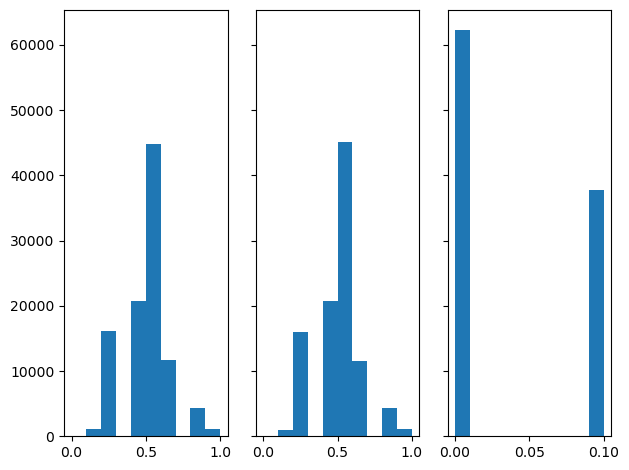

In [6]:
import matplotlib.pyplot as plt

total_coins = 1000
total_flips = 10
total_runs = 100000
v1s, vrands, vmins = [],[],[]
for run in range(total_runs):
    v1,vrand,vmin = run_once(total_coins, total_flips)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
axs[0].hist(v1s,bins=n_bins)
axs[1].hist(vrands,bins=n_bins)
axs[2].hist(vmins,bins=n_bins)

## c) Using (b), plot estimates for $\mathbb{P}[\vert \nu - \mu \vert > \epsilon]$ as a function of $\epsilon$, together with the Hoeffding bound $2 e^{-2\epsilon^{2}N}$ (on the same graph)

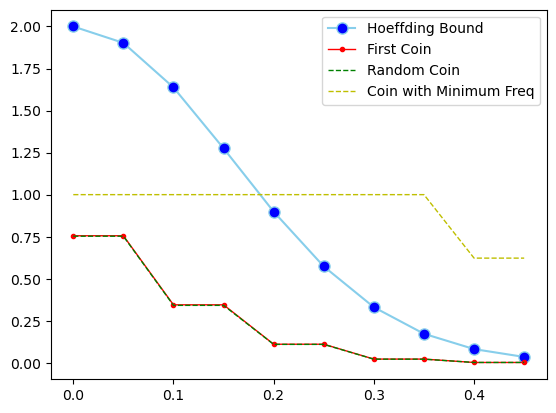

In [14]:
def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)

eps = np.arange(0.0,0.5,0.05)
bounds = hoeffding_bound(eps, total_flips)
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

p1, prand, pmin = np.zeros(len(eps)),np.zeros(len(eps)),np.zeros(len(eps))

for idx in range(eps.shape[0]):
    ep = eps[idx]
    p1[idx] = np.sum(v1d > ep)/total_runs
    prand[idx] = np.sum(vrandd > ep)/total_runs
    pmin[idx] = np.sum(vmind > ep)/total_runs

#plt.ylim((0,0.01))    
plt.plot(eps, bounds, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', label='Hoeffding Bound')
plt.plot(eps, p1, marker='.', color='r', linewidth=1, label='First Coin')
plt.plot(eps, prand, marker='', color='g', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(eps, pmin, marker='', color='y', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')
plt.legend()

## d) Which coins obey the Hoeffding bound, and which ones do not? Explain why

The first and random coins follow the Hoeffding bound. The coin with minimum frequency doesn't obey Hoeffding bound. This is because that for the first two coins, the coins were chosen before the experiment. While for the last one, we have to flip all the coins first, and use the data to compute out which is the coin with minimum frequency of heads. This violates the Hoeffding inequality condition which says the hypothesis $h$ has been fixed before samples were drawn.

## e) Relate part d) to the multiple bins in Figure 1.10. 

When we choose the coin having the minimum frequency of heads. We are like choosing the bin from 1000 bins (our hypothesis space). But we choose bin after we finish sampling the data. This is akin to learning algorithm for the final hypothesis. The other two coins were chosen before the sampling, which is choosing bin beforehand.

# Exercise 1.11

We are given a dataset $\mathcal{D}$ of $25$ training samples from an unknown target function $f:\mathcal{X}\rightarrow \mathcal{Y}$, where $\mathcal{X}=\mathbb{R}$ and $\mathcal{Y}=\{-1, +1\}$. To learn $f$, we use a simple hypothesis set $\mathcal{H}=\{h_{1}, h_{2}\}$ where $h_{1}$ is the constant $+1$ function and $h_{2}$ is the constant $-1$.

We consider two learning algorithms S(Smart) and C(Crazy). S chooses the hypothesis that agrees most with $D$ and C chooses the other hypothesis deliberately. Let us see how this algorithms performs out of sample from the deterministic and probabilistic point of view. Assume in the probabilistic view that there is a probability distribution on $\mathcal{X}$, and let $\mathbb{P}[f(x)=+1]=p$.

## a) Can S produce a hypothesis that is guaranteed to perform better than the random on any point outside $\mathcal{D}$

$S$ cannot produce a hypothesis $h$ that is guaranteed to perform better than the random on any point outside $\mathcal{D}$, because we $f$ is just unknown. Suppose the case the dataset $\mathcal{D}$ that we took was just the positive samples of $f$(all the samples were the output was +1), then $h$ will always fails on any point outside $\mathcal{D}$ for all of them has outputs $y=-1$. In the other case, let's consider a random hypothesis that returns $+1$ 50% of the times and $-1$ the other 50%. That random function will assert the output outside $\mathcal{D}$ 50% of the times, therefore, giving a better performance than S.

## b) Assume for the rest of the exercise that all the samples in $\mathcal{D}$ have $y_{n}=+1$. Is it possible that the hypothesis that C produces turns out to be better than the hypothesis that S produces?

 It is possible that C produces a better hypothesis than S. See the example above.

## c) If $p=0.9$, what is the probability that S will produce a better hypothesis than C?

S will have at least a probability of $0.9$ to produce a better hypothesis than C, because in the worst of the cases $\mathcal{D}$ contains just one sample of $\mathcal{X}$, and that sample will be 90% of the times one with output $+1$. Therefore, S will chose $h_{1}$ and C $h_{2}$. At the end, the hypothesis produced by S will assert the expected output $90$% of the times, while C just $10$% of them.

## d) Is there any value of $p$ for which it's more likely than not, that C will produce a a btter hypothesis than S?

From previous problem, we can see that when $p < 0.5$, S will produce a better hypothesis than C. Since C always produce $h_{2}$, which will match better $f$ than $h_{1}$, if $p < 0.5$.

# Exercise 1.12

A friend comes to you with a learning problem. She says the target function $f$ is completely unknown, but she has $4000$ data points. She is willing to pay you to solve her problem  and produce for her a function $g$ that approximates $f$. What is the best that you can promise her, along the following:
* a) After learning you will provide her with a $g$ that you will guarantee approximates $f$ well out of sample.
* b) After learning you will provide her with a $g$, and with high probability the $g$ which you produce will approximate $f$ well out of sample.
* c) One two things will happen.
    * You will produce a hypothesis $g$.
    * You will declare that you failed.
    
    If you do return a hypothesis $g$, then with high probability the $g$ which you produce will approximate $f$ well out of sample.

I would say the best I can promise is (c).

* Maybe the unknown target $f$ is very complex so we can't learn it at all.
* As we see in this section, since we have many data points, Hoeffding inequality tells us the probability of learning is actually high.